In [3]:
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
# log_file_path = 'hx57.log'
# log_file_path = 'hx57spin.log'
log_file_path = 'hxx.log'
df_log = pd.read_csv(log_file_path, header=0, dtype={'metadata': str})

# Display the first few rows to confirm successful import
df_log.head()

,time,x,y,z,yaw,throttle,roll_rate,pitch_rate,yaw_rate,x_ref,y_ref,z_ref,yaw_ref,pred_time,nr_time,ctrl_callback_time,v_norm,metadata
0,0.000002,-0.062988,0.012431,-0.237785,-0.030283,0.497394,-0.010730,-0.028063,0.011418,0.0,0.0,-0.9,0.0,3.074222,3.074222,3.331108,0,Hardware
1,3.333681,-0.062988,0.012431,-0.237785,-0.030283,0.510631,-0.017264,-0.044799,0.019240,0.0,0.0,-0.9,0.0,0.001534,0.001534,0.013292,0,jax_reg_wardi
2,3.369367,-0.063299,0.012605,-0.235030,-0.030341,0.521312,-0.022121,-0.057641,0.024663,0.0,0.0,-0.9,0.0,0.001899,0.001899,0.013498,0,1x Speed
3,3.384379,-0.063299,0.012605,-0.235030,-0.030341,0.529807,-0.025280,-0.065908,0.028427,0.0,0.0,-0.9,0.0,0.001449,0.001449,0.012084,0,helix_spin
4,3.399659,-0.063325,0.012570,-0.235025,-0.030352,0.536550,-0.026847,-0.071427,0.031067,0.0,0.0,-0.9,0.0,0.001639,0.001639,0.012492,0,0


In [10]:
# # Create a figure with 1 row and 2 columns
# fig, axs = plt.subplots(2, 2, figsize=(12, 6))
# axs[0,0].plot(df_log['x'], df_log['y'], label='Trajectory', color='blue', linewidth=1.8)
# axs[0,0].plot(df_log['x_ref'], df_log['y_ref'], label='Reference', color='red', linewidth=1.8)
# axs[0,0].set_title(r'$\mathbf{Circle~Nonlinear~Predictor~Flow~Accuracy}$', fontsize=12)
# axs[0,0].set_xlabel(r'$\mathbf{X~Position}$', fontsize=10)
# axs[0,0].set_ylabel(r'$\mathbf{Y~Position}$', fontsize=10)
# axs[0,0].legend(prop={'weight': 'bold'})

# # now plot z vs time and ref
# axs[0,1].plot(df_log['time'], df_log['z'], label='Z Position', color='blue', linewidth=1.8)
# axs[0,1].plot(df_log['time'], df_log['z_ref'], label='Z Reference', color='red', linewidth=1.8)
# axs[0,1].set_title(r'$\mathbf{Z~Position~vs~Time}$', fontsize=12)
# axs[0,1].set_xlabel(r'$\mathbf{Time~(s)}$', fontsize=10)
# axs[0,1].set_ylabel(r'$\mathbf{Z~Position}$', fontsize=10)
# axs[0,1].legend(prop={'weight': 'bold'})

# # yaw and yaw_ref over time
# axs[1,0].plot(df_log['time'], df_log['yaw'], label='Yaw', color='blue', linewidth=1.8)
# axs[1,0].plot(df_log['time'], df_log['yaw_ref'], label='Yaw Reference', color='red', linewidth=1.8)
# axs[1,0].set_title(r'$\mathbf{Yaw~vs~Time}$', fontsize=12)
# axs[1,0].set_xlabel(r'$\mathbf{Time~(s)}$', fontsize=10)
# axs[1,0].set_ylabel(r'$\mathbf{Yaw~(rad)}$', fontsize=10)
# axs[1,0].legend(prop={'weight': 'bold'})


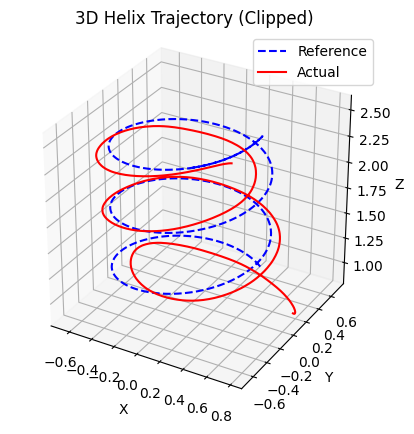

In [13]:
import pandas as pd
import matplotlib.pyplot as plt

# === Load data ===
# df = pd.read_csv('hx57.log')
battery_adj = 1*(df_log['z'].min() - df_log['z_ref'].min())
# === Time bounds ===
start_time = df_log['time'].iloc[0] + 40.0
end_time = df_log['time'].iloc[-1] - 55.0

# === Clip data to valid window ===
df_clipped = df_log[(df_log['time'] >= start_time) & (df_log['time'] <= end_time)]

# === Extract columns ===
x = df_clipped['x']
y = df_clipped['y']
z = df_clipped['z']
x_ref = df_clipped['x_ref']
y_ref = df_clipped['y_ref']
z_ref = df_clipped['z_ref']

# === Plot ===
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot3D(x_ref, y_ref, -z_ref, 'b--', label='Reference')
ax.plot3D(x, y, -z + battery_adj, 'r-', label='Actual')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('3D Helix Trajectory (Clipped)')
ax.legend()
ax.set_box_aspect([1, 1, 1])
# ax.zaxis_inverted()
plt.show()
